# ML - HW5 - Q7
# Ali Khoramfar - 810102129

# Import libraries

In [26]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean


In [27]:
warnings.filterwarnings('ignore')

# Dataset

## Load the dataset

In [28]:
df = pd.read_csv('/kaggle/input/customer-dateset/customers_dataset.csv')

## EDA

In [29]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [30]:
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


In [31]:
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
              Age      Income       Score
count  200.000000  200.000000  200.000000
mean    38.850000   60.560000   50.200000
std     13.969007   26.264721   25.823522
min     18.000000   15.000000    1.000000
25%     28.750000   41.500000   34.750000
50%     36.000000   61.500000   50.000000
75%     49.000000   78.000000   73.000000
max     70.000000  137.000000   99.000000


In [32]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Gender    0
Age       0
Income    0
Score     0
dtype: int64


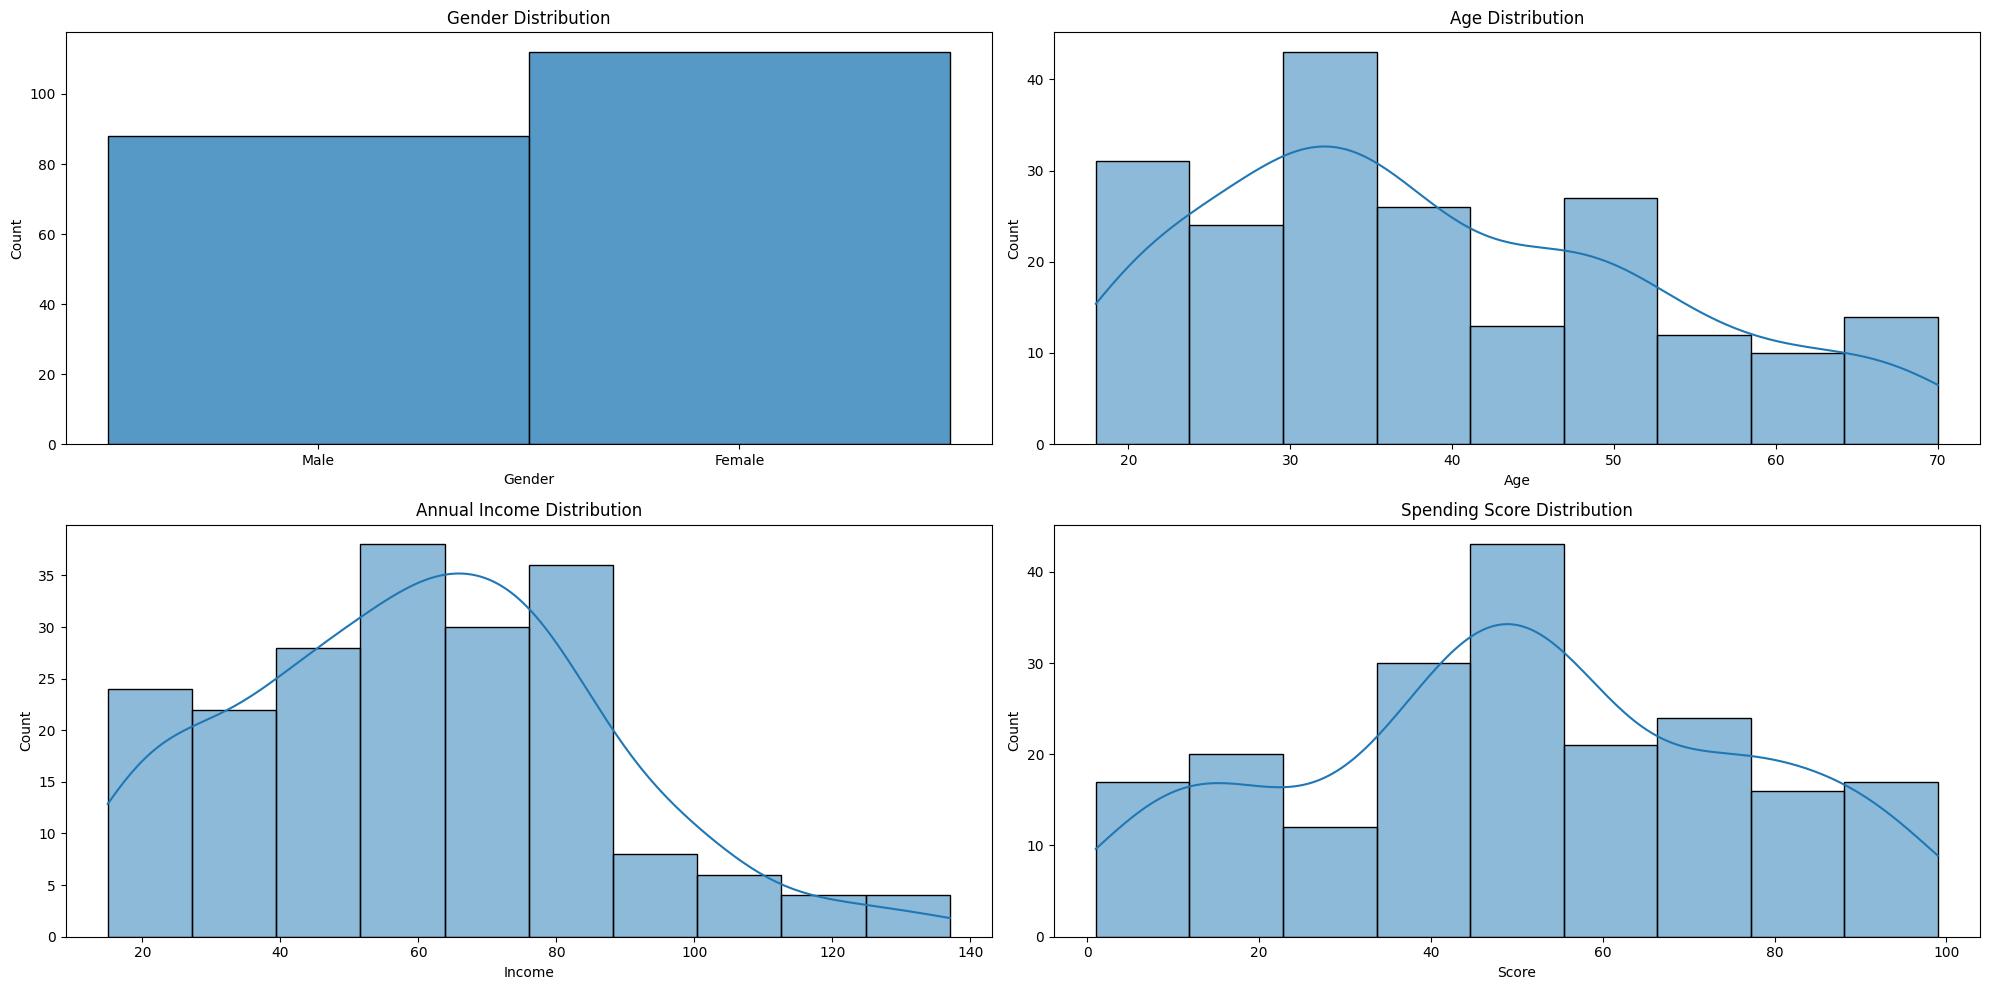

In [33]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['Gender'], kde=False)
plt.title('Gender Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Income'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Score'], kde=True)
plt.title('Spending Score Distribution')
plt.tight_layout()
plt.show()

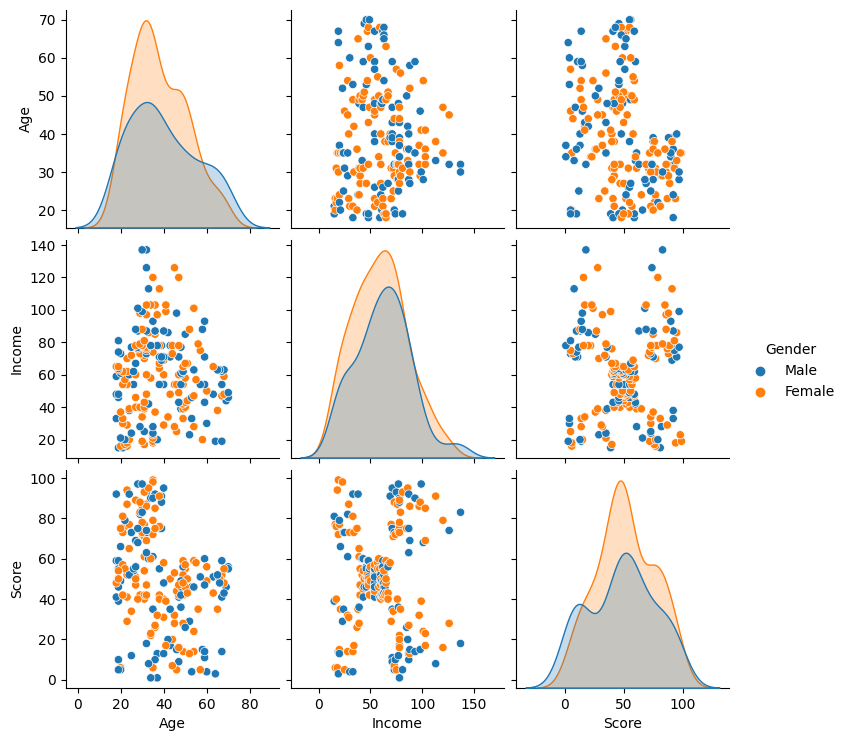

In [34]:
sns.pairplot(df, hue='Gender')
plt.show()

## Convert 'Gender' to numerical

In [35]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [36]:
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Standardize 

In [37]:
scaler = StandardScaler()
df[['Age', 'Income', 'Score']] = scaler.fit_transform(df[['Age', 'Income', 'Score']])

In [38]:
df.head()

,Gender,Age,Income,Score
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


# Optimal Number of Clusters

In [39]:
cluster_range = range(2, 11)
inertia = []
silhouette_scores = []
davies_bouldin_indices = []
calinski_harabasz_indices = []

In [40]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, labels))
    davies_bouldin_indices.append(davies_bouldin_score(df, labels))
    calinski_harabasz_indices.append(calinski_harabasz_score(df, labels))

## K-means Distortion (Elbow Method)

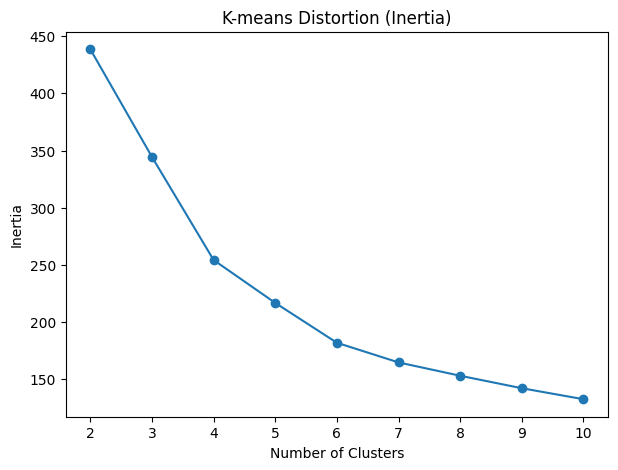

In [41]:
plt.figure(figsize=(7, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('K-means Distortion (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Silhouette Score

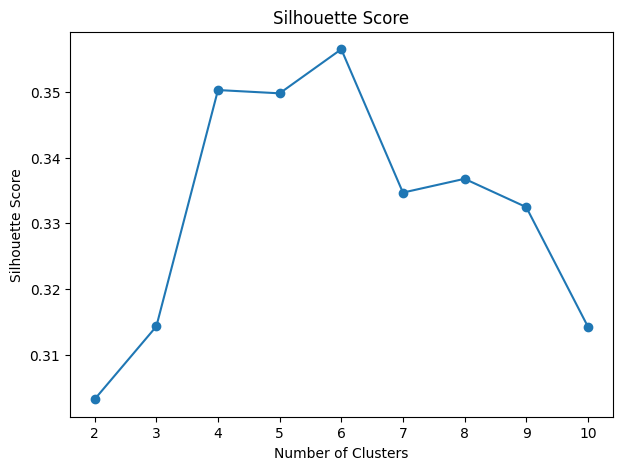

In [42]:
plt.figure(figsize=(7, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Davies-Bouldin Index

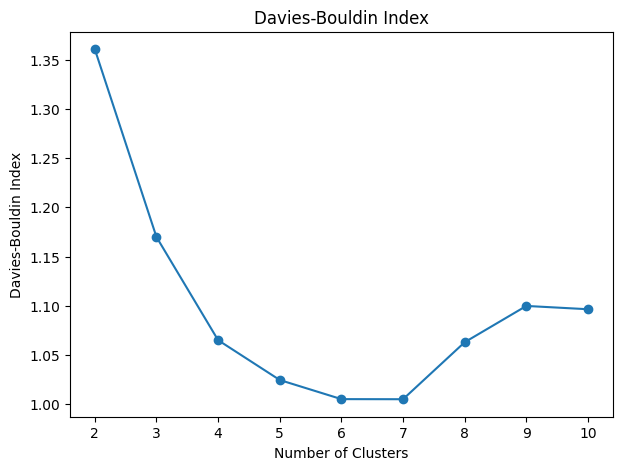

In [43]:
plt.figure(figsize=(7, 5))
plt.plot(cluster_range, davies_bouldin_indices, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

## Calinski-Harabasz Index

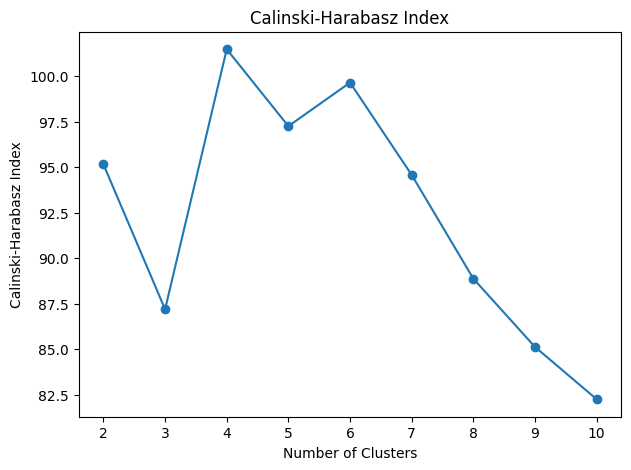

In [44]:
plt.figure(figsize=(7, 5))
plt.plot(cluster_range, calinski_harabasz_indices, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

## Dunn Index

In [45]:
def dunn_index(data, labels):
    unique_clusters = np.unique(labels)
    max_intra_cluster_dist = 0
    min_inter_cluster_dist = float('inf')
    
    for cluster in unique_clusters:
        cluster_points = data[labels == cluster]
        
        for i in range(len(cluster_points)):
            for j in range(i + 1, len(cluster_points)):
                dist = euclidean(cluster_points[i], cluster_points[j])
                if dist > max_intra_cluster_dist:
                    max_intra_cluster_dist = dist
    for i in range(len(unique_clusters)):
        for j in range(i + 1, len(unique_clusters)):
            cluster_i = data[labels == unique_clusters[i]]
            cluster_j = data[labels == unique_clusters[j]]
            
            for point_i in cluster_i:
                for point_j in cluster_j:
                    dist = euclidean(point_i, point_j)
                    if dist < min_inter_cluster_dist:
                        min_inter_cluster_dist = dist
    
    return min_inter_cluster_dist / max_intra_cluster_dist

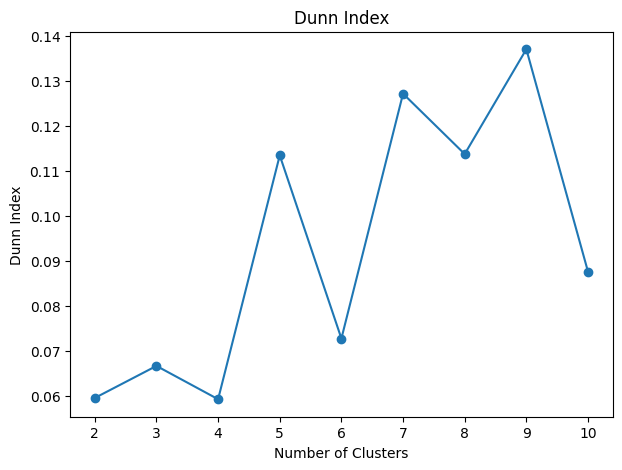

In [46]:
dunn_indices = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    dunn_indices.append(dunn_index(df.values, labels))

plt.figure(figsize=(7, 5))
plt.plot(cluster_range, dunn_indices, marker='o')
plt.title('Dunn Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Dunn Index')
plt.show()

* K-means Distortion (Elbow Method): 4 clusters
* Silhouette Score: 6 clusters
* Davies-Bouldin Index: 6 clusters
* Calinski-Harabasz Index: 4 clusters
* Dunn Index: 9 clusters

## PCA Visualization


In [85]:
def perform_pca_and_plot(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df[['Gender', 'Age', 'Income', 'Score']])
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df[['Gender', 'Age', 'Income', 'Score']])
    
    df['PCA1'] = pca_result[:, 0]
    df['PCA2'] = pca_result[:, 1]
    
    plt.figure(figsize=(10, 7))
    palette = sns.color_palette("Set1", n_clusters)
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette=palette, data=df, legend="full")
    plt.title(f'PCA Clustering for {n_clusters} Clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster')
    plt.show()

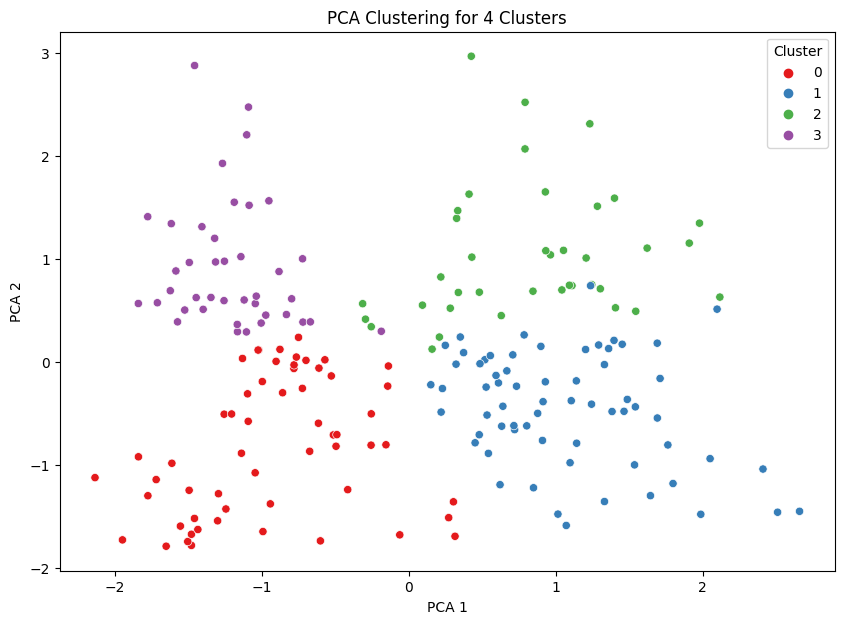

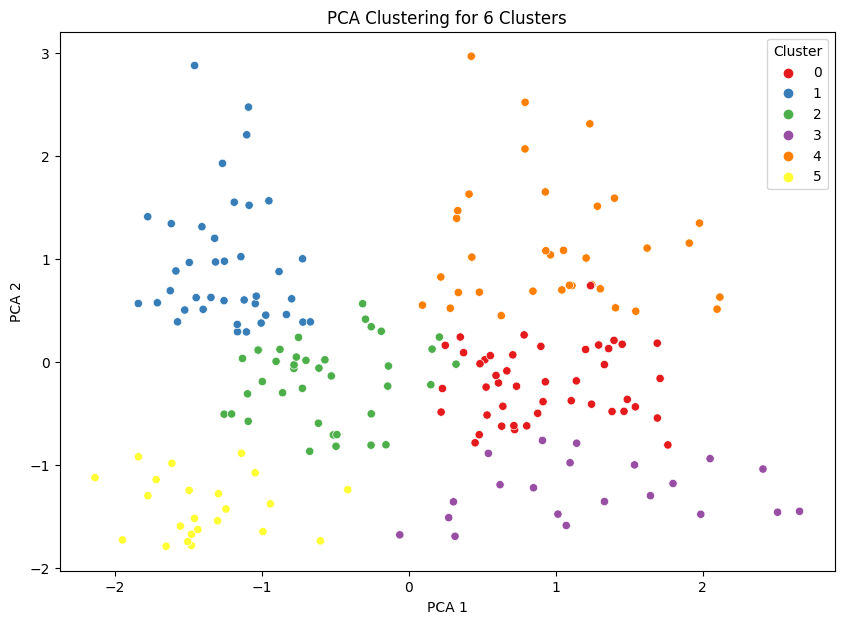

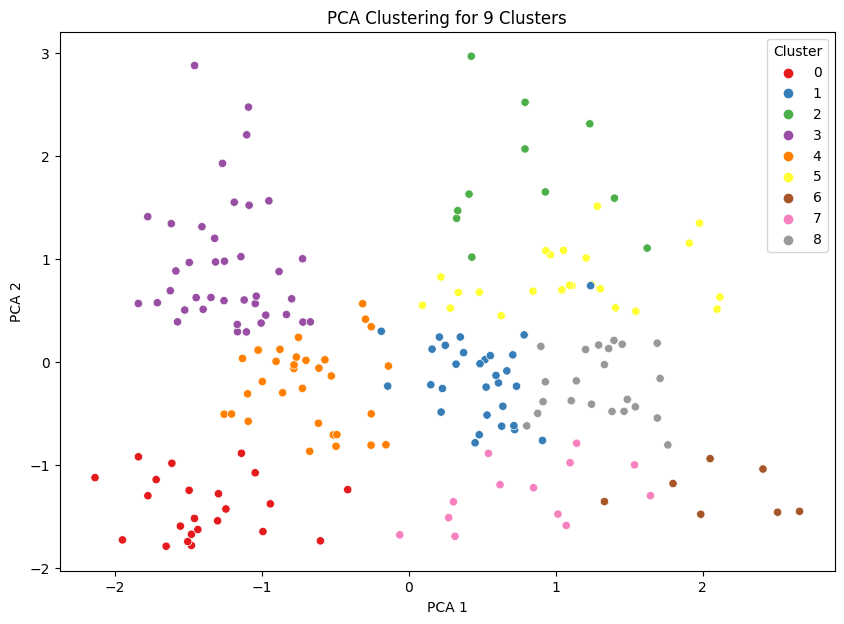

In [86]:
for n_clusters in [4, 6, 9]:
    perform_pca_and_plot(df.copy(), n_clusters)

### PCA Loadings

In [89]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loadings_df = pd.DataFrame(loadings, columns=['PCA1', 'PCA2'], index=['Gender', 'Age', 'Income', 'Score'])

print("PCA Loadings:")
print(loadings_df)

PCA Loadings:
            PCA1      PCA2
Gender  0.043161  0.039560
Age     0.816125  0.026852
Income -0.051561  1.000999
Score  -0.815839 -0.034309


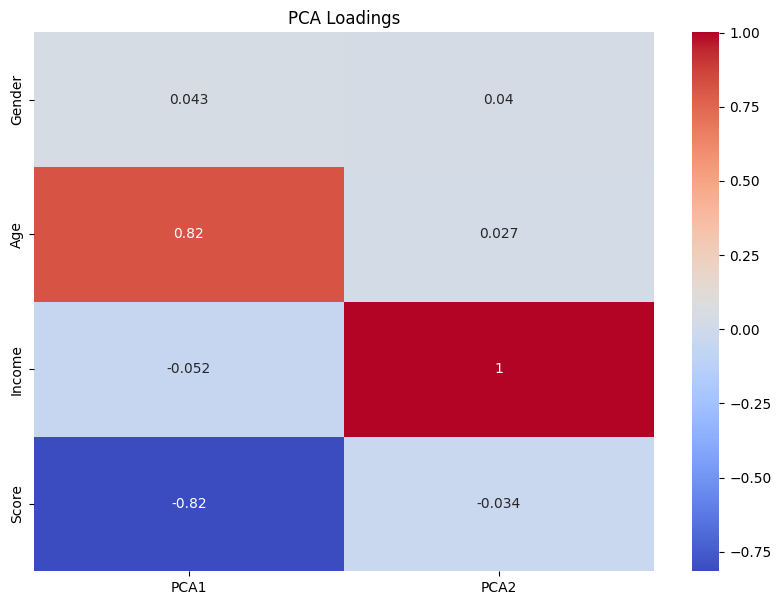

In [91]:
plt.figure(figsize=(10, 7))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings')
plt.show()

## t-SNE for visualization

In [87]:
def perform_tsne_and_plot(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df[['Gender', 'Age', 'Income', 'Score']])
    
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(df[['Gender', 'Age', 'Income', 'Score']])
    
    df['TSNE1'] = tsne_result[:, 0]
    df['TSNE2'] = tsne_result[:, 1]
    
    plt.figure(figsize=(10, 7))
    palette = sns.color_palette("Set1", n_clusters)
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette=palette, data=df, legend="full")
    plt.title(f't-SNE Clustering for {n_clusters} Clusters')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(title='Cluster')
    plt.show()

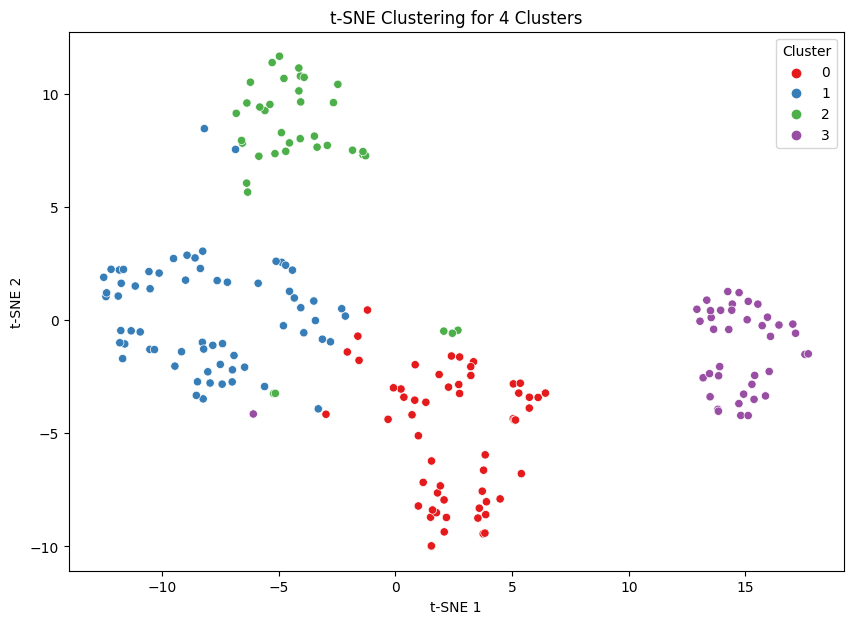

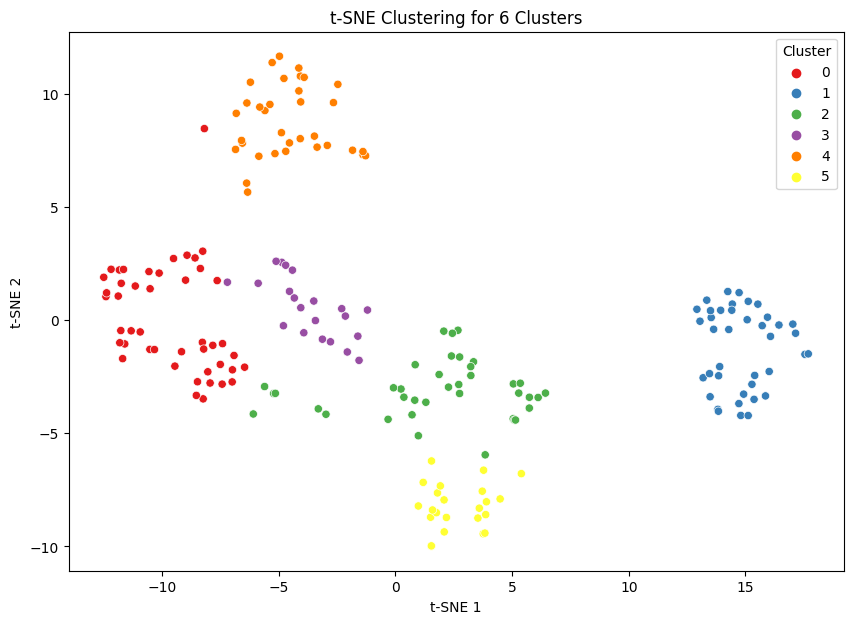

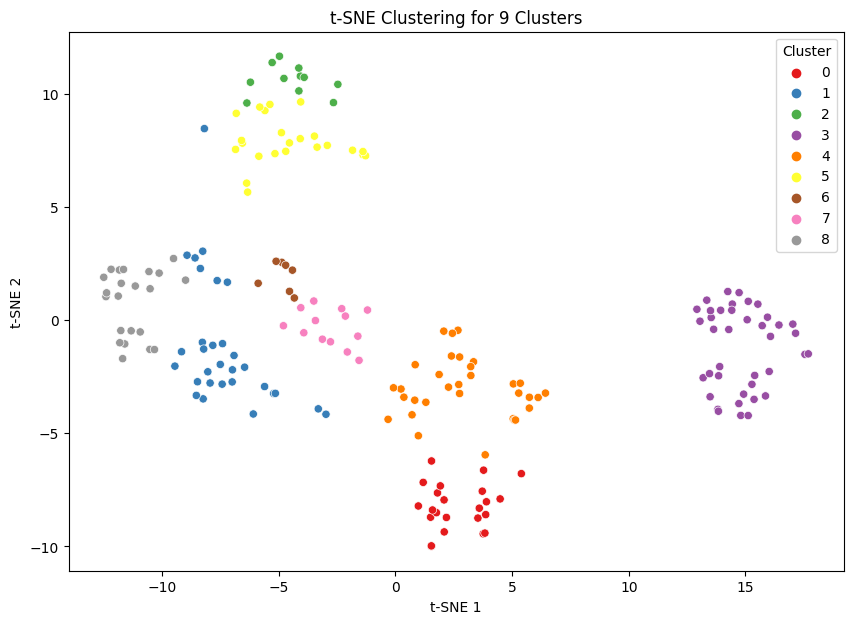

In [88]:
for n_clusters in [4, 6, 9]:
    perform_tsne_and_plot(df.copy(), n_clusters)

In [96]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Gender', 'Age', 'Income', 'Score']])
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df[['Gender', 'Age', 'Income', 'Score']])
df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]

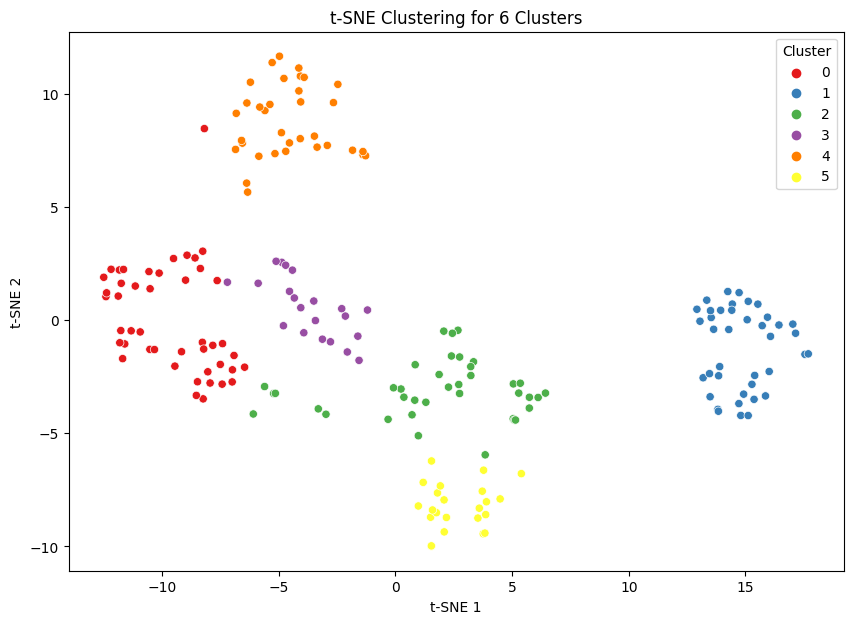

In [97]:
plt.figure(figsize=(10, 7))
palette = sns.color_palette("Set1", n_clusters)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette=palette, data=df, legend="full")
plt.title(f't-SNE Clustering for {n_clusters} Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

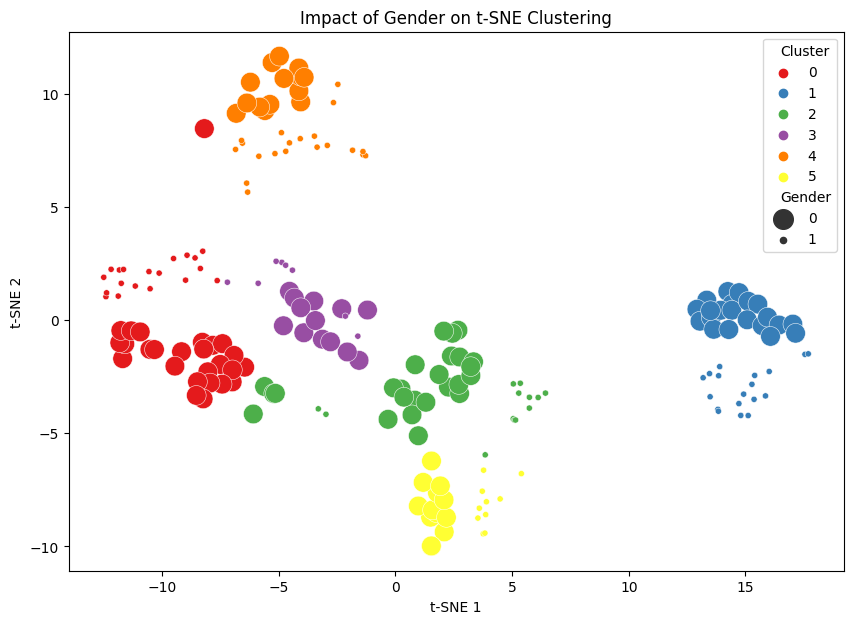

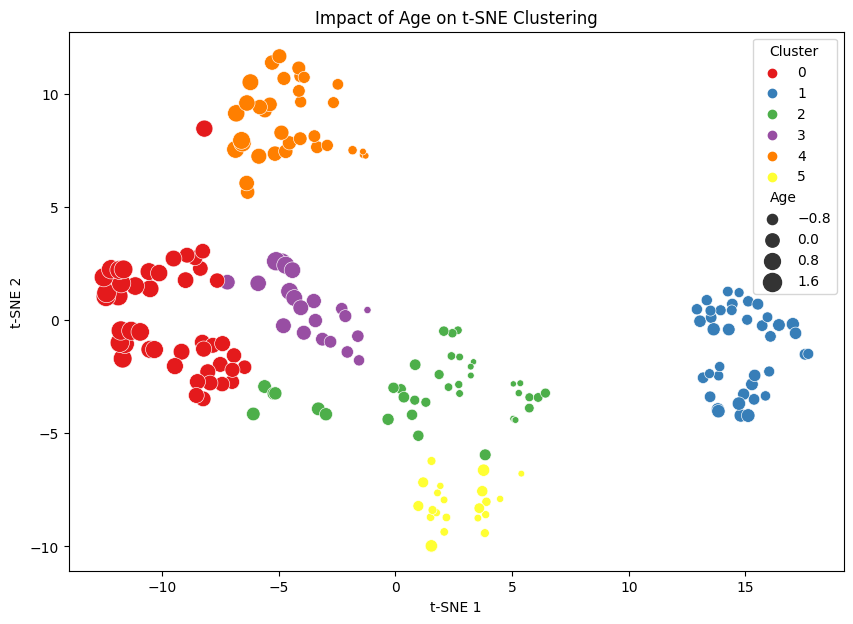

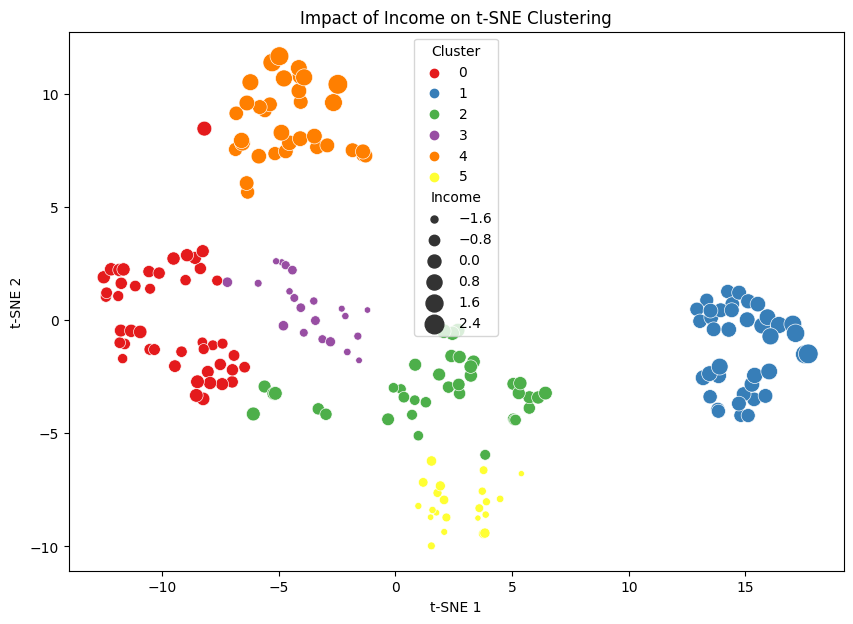

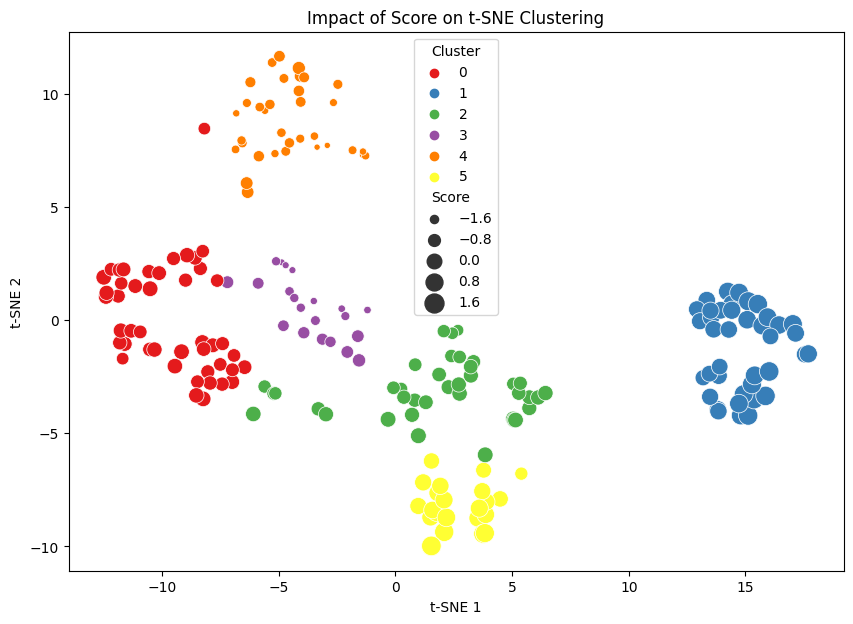

In [100]:
def plot_feature(df, feature, n_clusters):
    plt.figure(figsize=(10, 7))
    palette = sns.color_palette("Set1", n_clusters)
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', size=feature, sizes=(20, 200), palette=palette, data=df)
    plt.title(f'Impact of {feature} on t-SNE Clustering')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()

features = ['Gender', 'Age', 'Income', 'Score']
for feature in features:
    plot_feature(df, feature, n_clusters)